In [12]:
import tensorflow as tf 
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [2]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [3]:
#preprocessing the data
X_train=X_train/255.0
X_test=X_test/255.0


In [4]:
model=models.Sequential(

    [

        layers.Flatten(input_shape=(28,28)),
        layers.Dense(128,activation='relu'),
        layers.Dense(60,activation='relu'),
        layers.Dense(10, activation='softmax') 

    ]
)

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 20ms/step - accuracy: 0.8779 - loss: 0.4230
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9686 - loss: 0.1023
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.9793 - loss: 0.0658
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 19ms/step - accuracy: 0.9840 - loss: 0.0497
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9867 - loss: 0.0400


In [ ]:
#evaluate the accuracy 

test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')



313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9725 - loss: 0.0949
Test accuracy: 0.977400004863739


In [14]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))
cr=classification_report(y_test, model.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


Text(0.5, 1.0, 'Confusion Matrix')

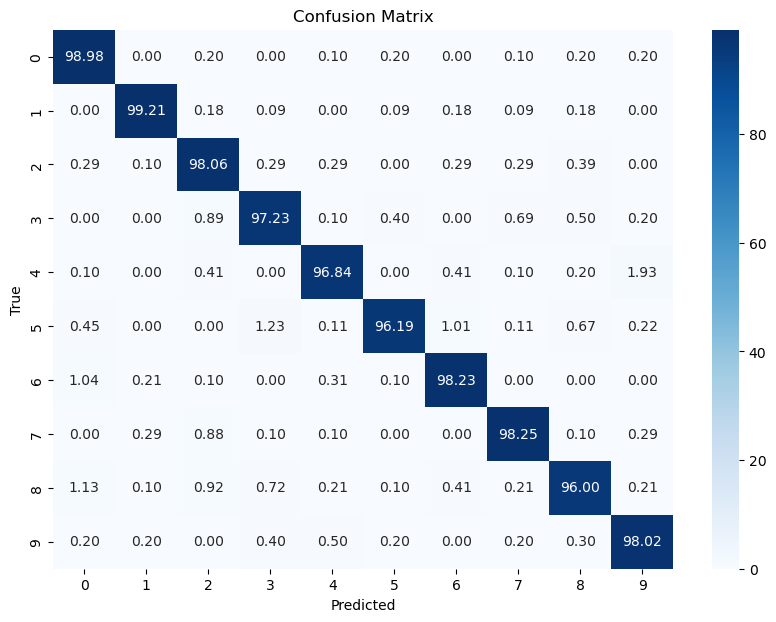

In [ ]:
#ploting cm (confusion matrix )
import seaborn as sns
import matplotlib.pyplot as plt
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(10,7))


sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

In [18]:
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [33]:
#storing the model in a pickle file
model.save('mnist_model_keras.h5')


In [35]:
from tensorflow.keras.models import load_model

#importing the trained model from pickle 
model = load_model('mnist_model_keras.h5')

FileUpload(value={}, accept='image/*', description='Upload')

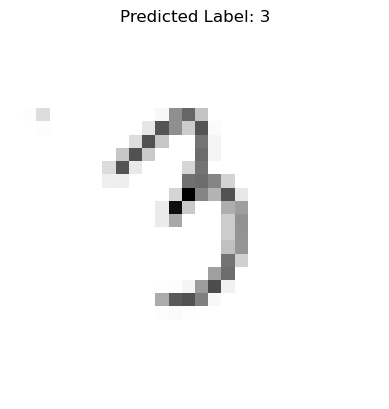

In [36]:
import ipywidgets as widgets
from IPython.display import display
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import io

import matplotlib.pyplot as plt

# File upload widget
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

def on_upload_change(change):
    if uploader.value:
        # Get uploaded file
        file_info = next(iter(uploader.value.values()))
        img_bytes = file_info['content']
        
        # Load and preprocess the image
        img = Image.open(io.BytesIO(img_bytes)).convert('L').resize((28, 28))
        img_array = np.array(img) / 255.0
        img_array = img_array.reshape(1, 28, 28)
        
        # Predict
        prediction = model.predict(img_array)
        predicted_label = prediction.argmax(axis=1)[0]
        
        # Show image and prediction
        plt.imshow(img_array[0], cmap='gray')
        plt.title(f'Predicted Label: {predicted_label}')
        plt.axis('off')
        plt.show()
      
        


uploader.observe(on_upload_change, names='value') 